In [188]:
# imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor


In [158]:
# import dataset
data_biden = pd.read_csv (r'D:\computational\ps6\MachineLearning\biden.csv') 
data_biden

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1
...,...,...,...,...,...,...
1802,100,1,80,15,1,0
1803,60,1,30,16,0,0
1804,70,1,60,12,1,0
1805,60,1,91,8,1,0


# Part 1


In [159]:
#defining predictor and featurs and featur names
y = data_biden['biden'].values
x = data_biden[['female', 'age', 'educ', 'dem', 'rep', ]].values
x_var=['female', 'age', 'educ', 'dem', 'rep']
#Spliting the data into a training set (70%) and a test set (30%) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3,random_state=25)
# fitting a decision tree to the training data by using recursive binary splitting
d_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
b_tree= d_tree.fit(x_train, y_train)

In [160]:
# ploting tree
r = export_text(b_tree, feature_names=x_var)
print(r)

|--- dem <= 0.50
|   |--- rep <= 0.50
|   |   |--- female <= 0.50
|   |   |   |--- value: [56.49]
|   |   |--- female >  0.50
|   |   |   |--- value: [61.27]
|   |--- rep >  0.50
|   |   |--- female <= 0.50
|   |   |   |--- value: [38.33]
|   |   |--- female >  0.50
|   |   |   |--- value: [44.89]
|--- dem >  0.50
|   |--- age <= 54.50
|   |   |--- educ <= 15.50
|   |   |   |--- value: [71.11]
|   |   |--- educ >  15.50
|   |   |   |--- value: [76.59]
|   |--- age >  54.50
|   |   |--- female <= 0.50
|   |   |   |--- value: [75.19]
|   |   |--- female >  0.50
|   |   |   |--- value: [80.29]



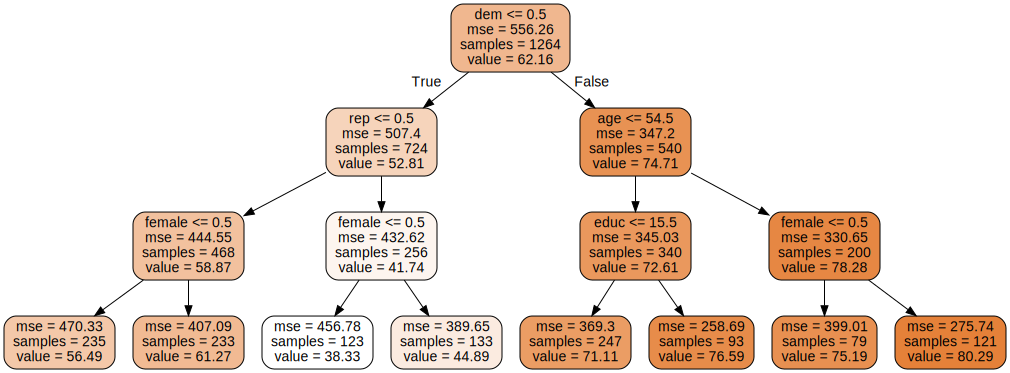

In [161]:
from sklearn.tree import export_graphviz
import graphviz

biden_trvis = export_graphviz(
    biden_tree,
    out_file=None,
    feature_names=x_var,
    rounded=True,
    filled=True,
    precision=2,
)

graph = graphviz.Source(biden_trvis)
graph.render('biden_trvis')
graph

# Interpretation
 For male and female who is neither republican nor democrat the average predicted value of the thermometer is 56.49 and 61.27 respectively. For republican male and female, the average predicted value of the thermometer is 38.33 and 44.89 respectively. For democrat male and female whose ages are less than 54.5 years and educations are less than 15.5 years the average predicted values of the thermometer is 71.11 and 76.59 if their number of years of education is more than 15.5. For democrat male and female who are older than 54.5 years, the average predicted values of the thermometer are 75.19 and 80.29 respectively. 

# MSE TEST


In [162]:
MSE = mean_squared_error(y_test, b_tree.predict(x_test))
print('The MSE of a tree of depth ', b_tree.get_depth(), ' and ',
      biden_tree.get_n_leaves(), ' leaves = ', MSE)

The MSE of a tree of depth  3  and  8  leaves =  396.1937146321307


# Part 2

In [208]:
#Setting parameter distributions
param_dist = {"max_depth": [3 , 10],
              "min_samples_split": sp_randint (2 , 20 ),
              "min_samples_leaf": sp_randint (2 , 20 )}

In [210]:
#fitting random model
r_search = RandomizedSearchCV(b_tree, param_distributions=param_dist,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')
r_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=3,
                                                   min_samples_leaf=5),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [3, 10],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000170177B7AC0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017017755580>},
                   random_state=25, scoring='neg_mean_squared_error')

In [186]:
#optimal tuning parameter values
print('Best random parameters =', r_search.best_params_)
print(' MSE for optimal results =', -r_search.best_score_)

Best random parameters = {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
 MSE for optimal results = 401.713307249986


# part 3

In [189]:
#Setting parameter distributions
param_dist1 = {"n_estimators": [10 , 200],
              "max_depth": [3 , 10],
              "min_samples_split": sp_randint (2 , 20 ) ,
              "min_samples_leaf": sp_randint (2 , 20 ) ,
              "max_features": sp_randint (1 , 5)}

In [204]:
#fitting random model
est_rf=RandomForestRegressor()
search_forest = RandomizedSearchCV(est_rf, 
                         param_distributions=param_dist1, 
                         n_iter=100, n_jobs=-1, cv=5, 
                         random_state=25, 
                         scoring='neg_mean_squared_error')
search_forest = search_forest.fit(x_train,y_train)

In [205]:
#optimal tuning parameter values
print('Best random parameters =', search_forest.best_params_)
print(' MSE for optimal results =', -search_forest.best_score_)

Best random parameters = {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 19, 'min_samples_split': 2, 'n_estimators': 200}
 MSE for optimal results = 397.84567595657415
